## Importing Libraries

In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from datetime import datetime
import geopandas
from sklearn.impute import SimpleImputer


## Getting to know the Data


### Description of the Provided CSV Files

- **ticket_data.csv**:
  Contains a ticket history where each row represents a ticket proposal on tictactrip.

- **cities.csv**:
  Contains information about cities served by tictactrip. Links can be established through the columns 'o_city' (origin_city) and 'd_city' (destination_city) in the ticket_data.

- **stations.csv**:
  Includes data about stations served by tictactrip. Links can be established through the columns 'o_station' and 'd_station' in the ticket_data.

- **providers.csv**:
  Provides information about different providers. Relationships can be made via the 'company' column in ticket_data. A provider refers to a subsidiary company. For instance, TGV and TER are two providers under VSC (voyages-sncf).

The provided information outlines the content and relationships between the datasets. These relationships are established through specific columns across the datasets, facilitating data linkage and analysis within the context of tictactrip services.


In [3]:
cities = pd.read_csv("Data\\cities.csv")
providers = pd.read_csv("Data\\providers.csv")
stations = pd.read_csv("Data\\stations.csv")
ticket = pd.read_csv("Data\\ticket_data.csv")

In [4]:
dataframes = [("cities", cities), ("providers", providers), ("stations", stations), ("ticket", ticket)]

for df_name, df in dataframes:

    print(f"Columns of {df_name} \n{df.columns.tolist()}\n")

Columns of cities 
['id', 'local_name', 'unique_name', 'latitude', 'longitude', 'population']

Columns of providers 
['id', 'company_id', 'provider_id', 'name', 'fullname', 'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type']

Columns of stations 
['id', 'unique_name', 'latitude', 'longitude']

Columns of ticket 
['id', 'company', 'o_station', 'd_station', 'departure_ts', 'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations', 'other_companies', 'o_city', 'd_city']



## Renaming Columns in Datasets for Enhanced Clarity and Manageability

In this section, columns within multiple datasets have been renamed utilizing Pandas functionality. The objective behind this action is to enhance the clarity and manageability of the datasets by assigning more explicit and descriptive column names.

Below is the Python code snippet showcasing the column renaming process:

## Exploring the Datasets

### Overview and Statistical Summary

The following code snippets offer insights into the datasets, providing a comprehensive understanding of its structure, statistical characteristics, and missing values.

In [ ]:


cities.drop(['local_name'], axis=1, inplace=True)
cities.rename(columns={'id':'city_id',
                            'unique_name':'city_name',
                            'latitude':'city_latitude',
                            'longitude':'city_longitude',
                            'population':'city_population'}, inplace=True)


providers.rename(columns={'id':'true_company_id',
                               'name':'company_name',
                               'fullname':'company_fullname'}, inplace=True)

stations.rename(columns={'id':'station_id',
                              'unique_name' : 'station_name',
                              'latitude':'station_latitude',
                              'longitude':'station_longitude'}, inplace=True)


ticket.rename(columns={'id':'ticket_id'}, inplace=True)

     

In [28]:
dataframes = [("cities", cities), ("providers", providers), ("stations", stations), ("ticket", ticket)]

for df_name, df in dataframes:

    print(f"Columns of {df_name} \n{df.columns.tolist()}\n")

Columns of cities 
['city_id', 'city_name', 'city_latitude', 'city_longitude', 'city_population']

Columns of providers 
['true_company_id', 'company_id', 'provider_id', 'company_name', 'company_fullname', 'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type']

Columns of stations 
['station_id', 'station_name', 'station_latitude', 'station_longitude']

Columns of ticket 
['ticket_id', 'company', 'o_station', 'd_station', 'departure_ts', 'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations', 'other_companies', 'o_city', 'd_city', 'duration']



### Cities

In [6]:
print(cities.shape)
cities.head()

(8040, 5)


,city_id,city_name,city_latitude,city_longitude,city_population
0,5159,padua,45.406435,11.876761,209678.0
1,76,barcelona,41.385064,2.173404,1611822.0
2,81,basel,47.593437,7.619812,NaN
3,259,erlangen,49.589674,11.011961,105412.0
4,11979,balș,44.353354,24.095672,NaN


In [7]:
cities.describe()

,city_id,city_latitude,city_longitude,city_population
count,8040.000000,8040.000000,8040.000000,3.690000e+02
mean,6328.786816,47.223456,6.299331,3.360184e+05
std,3504.698537,3.700934,7.747070,5.840409e+05
min,1.000000,1.370676,-101.397388,1.000460e+05
25%,2501.500000,44.662402,1.214282,1.253750e+05
50%,7003.500000,47.304750,4.887856,1.803020e+05
75%,9014.250000,49.611998,10.311597,3.098690e+05
max,12192.000000,64.145981,48.731938,8.416535e+06


In [8]:
cities.isnull().sum()

city_id               0
city_name             1
city_latitude         0
city_longitude        0
city_population    7671
dtype: int64

### Providers

In [9]:
print(providers.shape)
providers.head()

(227, 10)


,true_company_id,company_id,provider_id,company_name,company_fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


In [10]:
providers.describe()

,true_company_id,company_id
count,227.000000,227.000000
mean,790.656388,9.343612
std,2251.823950,3.036065
min,9.000000,1.000000
25%,66.500000,9.000000
50%,127.000000,9.000000
75%,183.500000,9.000000
max,8389.000000,40.000000


In [11]:
providers.isnull().sum()

true_company_id          0
company_id               0
provider_id             14
company_name             0
company_fullname         0
has_wifi                 3
has_plug                 3
has_adjustable_seats     3
has_bicycle              3
transport_type           0
dtype: int64

### Stations

In [12]:
print(stations.shape)
stations.head()


(11035, 4)


,station_id,station_name,station_latitude,station_longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [13]:
stations.describe()

,station_id,station_latitude,station_longitude
count,11035.000000,11035.000000,11035.000000
mean,5518.026914,47.526678,7.580807
std,3185.719813,3.953972,63.655681
min,1.000000,-22.355790,-22.625538
25%,2759.500000,44.896447,1.358655
50%,5518.000000,47.759670,5.824010
75%,8276.500000,50.349956,12.166133
max,11036.000000,64.137571,6645.000000


In [14]:
stations.isnull().sum()

station_id           0
station_name         0
station_latitude     0
station_longitude    0
dtype: int64

### Tickets

In [15]:
print(ticket.shape)
ticket.head()

(74168, 12)


,ticket_id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [16]:
ticket.describe()

,ticket_id,company,o_station,d_station,price_in_cents,o_city,d_city
count,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000
mean,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265
std,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575
min,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000
25%,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000
50%,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000
75%,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000
max,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000


In [17]:
ticket.isnull().sum()

ticket_id              0
company                0
o_station          41441
d_station          41441
departure_ts           0
arrival_ts             0
price_in_cents         0
search_ts              0
middle_stations    41441
other_companies    41441
o_city                 0
d_city                 0
dtype: int64

## Handling Missing Values Using SimpleImputer from Scikit-Learn

In this scenario, the `SimpleImputer` class from Scikit-Learn is employed to replace missing values with the most frequent data found within each column across multiple datasets. This technique helps in ensuring that missing values are substituted with the most commonly occurring values, thus preserving the integrity of the data.

The Python code snippet below demonstrates the application of `SimpleImputer` for each dataset:

In [18]:

my_imputer = SimpleImputer(strategy='most_frequent')

tickets = pd.DataFrame(my_imputer.fit_transform(ticket), columns=ticket.columns)
cities = pd.DataFrame(my_imputer.fit_transform(cities), columns=cities.columns)
stations = pd.DataFrame(my_imputer.fit_transform(stations), columns=stations.columns)
providers = pd.DataFrame(my_imputer.fit_transform(providers), columns=providers.columns)
     

## Data Analysis

###  Calculating the Prices

In [19]:
# Minimum, average, and maximum prices
min_price = ticket['price_in_cents'].min()
max_price = ticket['price_in_cents'].max()
mean_price = ticket['price_in_cents'].mean()

print(f"Price Information:")
print(f"Minimum Price: {min_price} cents --> {min_price/100} euros ")
print(f"Maximum Price: {max_price} cents --> {max_price/100} euros ")
print(f"Average Price: {mean_price:.2f} cents --> {(mean_price/100):.2f} euros \n")

Price Information:
Minimum Price: 300 cents --> 3.0 euros 
Maximum Price: 38550 cents --> 385.5 euros 
Average Price: 4382.71 cents --> 43.83 euros 



In [20]:
# more details in cents : LES PERCENTILES
Q1_25e_percentile=ticket.price_in_cents.describe()['25%']
Median=ticket.price_in_cents.describe()['50%']
Q3_75e_percentile=ticket.price_in_cents.describe()['75%']
print(Q1_25e_percentile/100)
print(Median/100)
print(Q3_75e_percentile/100)

19.0
33.5
52.5


### Adding Duration column to Ticket.csv

In [21]:
# Convert 'departure_ts' and 'arrival_ts' columns to datetime objects
ticket['departure_ts'] = pd.to_datetime(ticket['departure_ts'])
ticket['arrival_ts'] = pd.to_datetime(ticket['arrival_ts'])

# Calculate duration for each trip in seconds
ticket['duration'] = (ticket['arrival_ts'] - ticket['departure_ts']).dt.total_seconds()

# Calculate minimum, maximum, and average duration per trip
min_duration = ticket['duration'].min()
max_duration = ticket['duration'].max()
avg_duration = ticket['duration'].mean()

print(f"Minimum Duration per Trip: {min_duration  / 60} mn")
print(f"Maximum Duration per Trip: {max_duration  / 60} mn")
print(f"Average Duration per Trip: {avg_duration/ 60:.2f} mn")


Minimum Duration per Trip: 20.0 mn
Maximum Duration per Trip: 29571.0 mn
Average Duration per Trip: 424.62 mn


### Useful functions

In [127]:
# Station Coordinate Function
def station_coordinate(station_id):
    if pd.isna(station_id):
        return station_id
    else:
        latitude = float(stations[stations["station_id"] == station_id]["station_latitude"])
        longitude = float(stations[stations["station_id"] == station_id]["station_longitude"])
        return (latitude, longitude)

# City Coordinate Function
def city_coordinate(city_id):
    
    latitude = float(cities[cities["city_id"] == city_id]["city_latitude"])
    longitude = float(cities[cities["city_id"] == city_id]["city_longitude"])
    return (latitude, longitude)

# Company to Transport Function
def company_to_transport(company_id):
    
    transport_type = providers[providers["true_company_id"] == company_id]["transport_type"]
    return transport_type.iloc[0]

# Companies to Transport Function
def companies_to_transport(companies_id):
    transport_types = set()
    for ids in companies_id:
        transport_type = providers[providers["true_company_id"] == ids]["transport_type"]
        transport_types = set(transport_type).union(transport_types)
    return transport_types


The Geographical distance between two points/places is the distance measured along the surface of the earth. This distance between two lat/longs is based on some level of abstraction and it’s not an exact distance, which is unattainable if you are considering all the irregularities on the surface of earth.

Geodesic Distance Formula:
The geodesic distance is the shortest distance on the surface of an ellipsoidal model of the earth. The default algorithm uses the method is given by Karney (2013) (geodesic)

In [105]:
import math


def distance(origin, destination):
    """
    Calculate the Haversine distance.
    
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [130]:
print(station_coordinate(1), station_coordinate(2))
print("distance between them :", distance(station_coordinate(1), station_coordinate(2)))


(48.835296, 10.092956) (44.830226, -0.700883)
distance between them : 934.926910093219 km


Example

In [111]:
stations[stations['station_id'] == 1]


,station_id,station_name,station_latitude,station_longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956


In [113]:
stations[stations['station_id'] == 2]

,station_id,station_name,station_latitude,station_longitude
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883


In [119]:
from datetime import datetime

def calculate_time(row):
    
    date_format = '%Y-%m-%d %H:%M:%S+00'
    departure_time = datetime.strptime(row["departure_ts"], date_format)
    arrival_time = datetime.strptime(row["arrival_ts"], date_format)
    
    duration = arrival_time - departure_time
    return duration

In [58]:
def get_id(id_str):
    if pd.isna(id_str):
        return set()
    else:
        id_str = id_str[1:-1]
        id_int = id_str.split(",")
        id_int = {int(x) for x in id_int}
        return id_int
    
def get_type(type_list):
    type_str = ','.join(type_list)
    return type_str    


###
To calculate the distances between the origin city (o_city) and the destination city (d_city) using latitude and longitude information from the provided datasets, you can follow these steps:

* Merge DataFrames: Merge the cities DataFrame twice with the ticket DataFrame to get the latitude and longitude information for both the origin and destination cities.
* Calculate Distances: Use the latitude and longitude values to compute the distances between the origin and destination cities.

In [143]:
ticket["coor_o_city"] = ticket.apply(lambda row: city_coordinate(row["o_city"]), axis = 1)
ticket["coor_d_city"] = ticket.apply(lambda row: city_coordinate(row["d_city"]), axis = 1)
ticket["dis_city"] = ticket.apply(lambda row: distance(row["coor_o_city"],row["coor_d_city"] ), axis = 1 )

In [144]:
ticket[:5]

,ticket_id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,coor_o_city,coor_d_city,dis_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,22200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,64200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,115020.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,77700.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,78360.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km


In [145]:
ticket["transport_type"] = ticket.apply(lambda row: company_to_transport(row["company"]), axis = 1)
ticket["middle_stations"] = ticket.apply(lambda row : get_id(row["middle_stations"]), axis = 1)
ticket["other_companies"] = ticket.apply(lambda row : get_id(row["other_companies"]), axis = 1)

In [146]:
ticket[:5]

,ticket_id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,coor_o_city,coor_d_city,dis_city,transport_type
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,{},{},611,542,22200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,carpooling
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{418, 149}",{13},611,542,64200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,bus
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{6246, 6794, 798}","{8376, 8377}",611,542,115020.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,train
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{6246, 6794, 798}","{8376, 8377}",611,542,77700.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,train
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,{5983},{8380},611,542,78360.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,train


In [147]:
ticket["all_companies"] = ticket.apply(lambda row : row["other_companies"].union(set([row["company"]])), axis = 1)
ticket["all_transport_types"] = ticket.apply(lambda row: companies_to_transport(row["all_companies"]), axis = 1)

In [148]:
ticket[:5]

,ticket_id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,coor_o_city,coor_d_city,dis_city,transport_type,all_companies,all_transport_types
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,{},{},611,542,22200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,carpooling,{8385},{carpooling}
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{418, 149}",{13},611,542,64200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,bus,"{9, 13}",{bus}
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{6246, 6794, 798}","{8376, 8377}",611,542,115020.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,train,"{8376, 8377}",{train}
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{6246, 6794, 798}","{8376, 8377}",611,542,77700.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,train,"{8376, 8377}",{train}
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,{5983},{8380},611,542,78360.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,train,"{8380, 8381}",{train}


In [151]:
ticket_copy=ticket.copy()

In [155]:

# Ajout d'une colonne pour la catégorie de distance
bins = [0, 200, 800, 2000, float('inf')]
labels = ['0-200 km', '201-800 km', '801-2000 km', '2000+ km']
ticket_copy['distance_category'] = pd.cut(ticket_copy['dis_city'], bins=bins, labels=labels)

# Grouper les données par mode de transport et tranche de distance, puis calculer les statistiques
result = ticket_copy.groupby(['transport_type', 'distance_category']).agg({
    'price_in_cents': 'mean'
}).reset_index()

# Affichage des statistiques
print(result)


   transport_type distance_category  price_in_cents
0             bus          0-200 km     2182.830918
1             bus        201-800 km     3494.850022
2             bus       801-2000 km     6949.950045
3             bus          2000+ km             NaN
4      carpooling          0-200 km     1177.352385
5      carpooling        201-800 km     3218.064310
6      carpooling       801-2000 km     8626.545455
7      carpooling          2000+ km             NaN
8           train          0-200 km     3487.900779
9           train        201-800 km     9124.779489
10          train       801-2000 km    15463.746130
11          train          2000+ km             NaN


In [154]:
ticket_copy

,ticket_id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,coor_o_city,coor_d_city,dis_city,transport_type,all_companies,all_transport_types,distance_category
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,{},{},611,542,22200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,carpooling,{8385},{carpooling},201-800 km
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{418, 149}",{13},611,542,64200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,bus,"{9, 13}",{bus},201-800 km
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{6246, 6794, 798}","{8376, 8377}",611,542,115020.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,train,"{8376, 8377}",{train},201-800 km
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{6246, 6794, 798}","{8376, 8377}",611,542,77700.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,train,"{8376, 8377}",{train},201-800 km
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,{5983},{8380},611,542,78360.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.1368310487561 km,train,"{8380, 8381}",{train},201-800 km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943+00,{408},{8371},628,562,48600.0,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",339.04676568506284 km,bus,"{8371, 13}",{bus},201-800 km
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943+00,{1105},{9},628,562,23400.0,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",339.04676568506284 km,bus,{9},{bus},201-800 km
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943+00,{1105},{9},628,562,24300.0,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",339.04676568506284 km,bus,"{9, 8371}",{bus},201-800 km
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943+00,{863},{13},628,562,27900.0,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",339.04676568506284 km,bus,{13},{bus},201-800 km


In [157]:
df2 = df.groupby(['distance_category','transport_type'])['price_in_cents'].max()
df2 = df2.reset_index()
df2

,distance_category,transport_type,price_in_cents
0,0-200 km,bus,22900.0
1,0-200 km,carpooling,12850.0
2,0-200 km,train,25100.0
3,201-800 km,bus,22480.0
4,201-800 km,carpooling,13800.0
5,201-800 km,train,38550.0
6,801-2000 km,bus,17400.0
7,801-2000 km,carpooling,16150.0
8,801-2000 km,train,37550.0
9,2000+ km,bus,NaN


In [158]:
df3 = df.groupby(['distance_category','transport_type'])['price_in_cents'].min()
df3 = df3.reset_index()
df3

,distance_category,transport_type,price_in_cents
0,0-200 km,bus,850.0
1,0-200 km,carpooling,300.0
2,0-200 km,train,490.0
3,201-800 km,bus,1000.0
4,201-800 km,carpooling,850.0
5,201-800 km,train,1400.0
6,801-2000 km,bus,2290.0
7,801-2000 km,carpooling,4496.0
8,801-2000 km,train,1940.0
9,2000+ km,bus,NaN


## Representations

### Prices Distribution

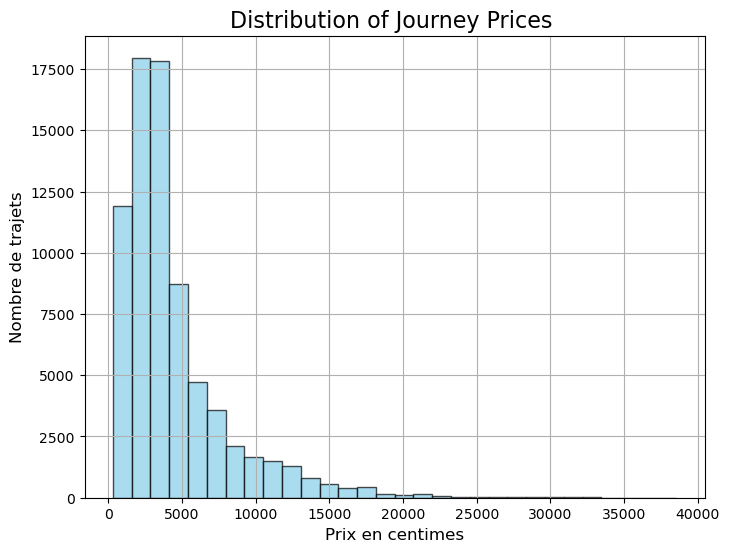

In [163]:

# Create a figure and axis to customize the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Histogram with adjusted bins and color
ax.hist(ticket['price_in_cents'], color='skyblue', edgecolor='black', bins=30, alpha=0.7)

# Title and labels with better font size and style
plt.title('Distribution of Journey Prices ', fontsize=16)
plt.xlabel('Prix en centimes', fontsize=12)
plt.ylabel('Nombre de trajets', fontsize=12)

# Adding grid lines for better readability
ax.grid(True)

# Show plot
plt.show()


Chart showing trip prices, categorized by trip distance and transportation mode.


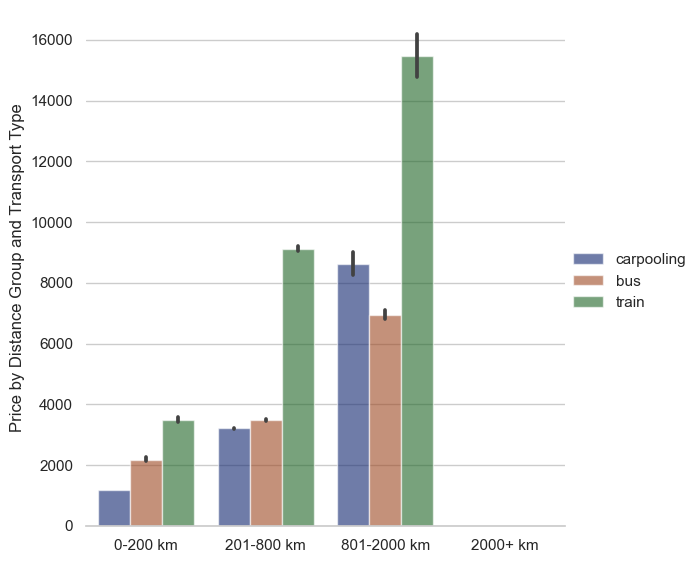

In [216]:
def draw_pricebar(dataframe):
    sns.set_theme(style="whitegrid")
    g = sns.catplot(
        data=dataframe, kind="bar",
        x="distance_category", y="price_in_cents", hue="transport_type",
        palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)
    g.set_axis_labels("", "Price by Distance Group and Transport Type")
    g.legend.set_title("")

draw_pricebar(ticket_copy)



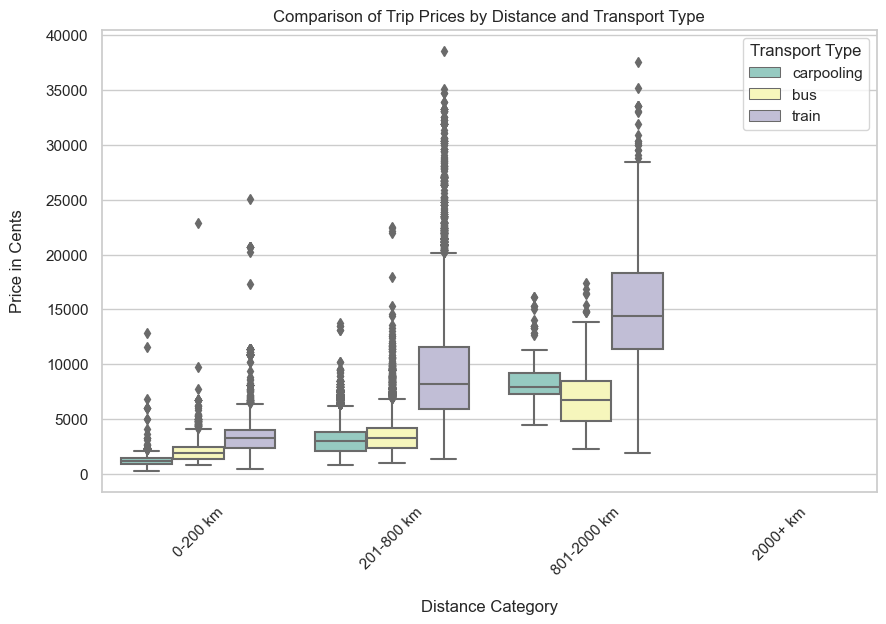

In [217]:
def compare_prices(dataframe):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    price_comparison = sns.boxplot(
        data=dataframe, 
        x="distance_category", y="price_in_cents", hue="transport_type",
        palette="Set3"
    )
    price_comparison.set_xlabel("Distance Category", labelpad=15)
    price_comparison.set_ylabel("Price in Cents", labelpad=15)
    price_comparison.set_title("Comparison of Trip Prices by Distance and Transport Type")
    price_comparison.legend(title="Transport Type")
    plt.xticks(rotation=45)
    plt.show()

compare_prices(ticket_copy)

### transport types/journeys

The distribution of transport types, average prices, and average durations per transport type based on the provided ticket data.

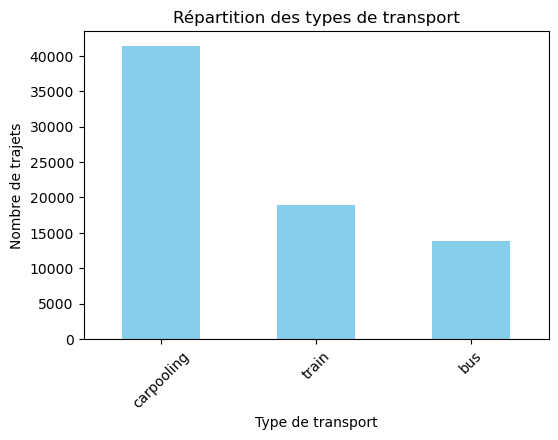

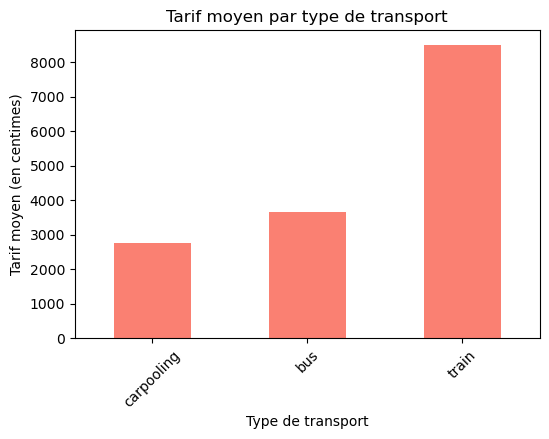

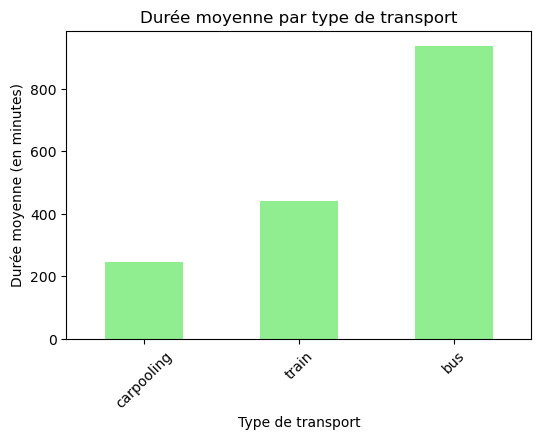

In [176]:
transport_counts = ticket_copy['transport_type'].value_counts()
plt.figure(figsize=(6, 4))
transport_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition des types de transport')
plt.xlabel('Type de transport')
plt.ylabel('Nombre de trajets')
plt.xticks(rotation=45)
plt.show()

# Comparaison des tarifs moyens par type de transport
avg_prices_by_transport = ticket_copy.groupby('transport_type')['price_in_cents'].mean().sort_values()
plt.figure(figsize=(6, 4))
avg_prices_by_transport.plot(kind='bar', color='salmon')
plt.title('Tarif moyen par type de transport')
plt.xlabel('Type de transport')
plt.ylabel('Tarif moyen (en centimes)')
plt.xticks(rotation=45)
plt.show()

# Comparaison de la durée moyenne par type de transport
ticket_copy['duration_minutes'] = ticket_copy['duration'] / 60  # Conversion de la durée en minutes
avg_duration_by_transport = ticket_copy.groupby('transport_type')['duration_minutes'].mean().sort_values()
plt.figure(figsize=(6, 4))
avg_duration_by_transport.plot(kind='bar', color='lightgreen')
plt.title('Durée moyenne par type de transport')
plt.xlabel('Type de transport')
plt.ylabel('Durée moyenne (en minutes)')
plt.xticks(rotation=45)
plt.show()


In [211]:
def draw_timebar(dataframe):
    sns.set(style="whitegrid")
    time_bar_plot = sns.barplot(
        data=dataframe, 
        x="distance_category", y="duration", hue="transport_type",
        palette="dark", errorbar=None
    )
    time_bar_plot.set_xlabel("", labelpad=20)  # Remove x-label or set a label if necessary
    time_bar_plot.set_ylabel("Duration by Distance Category and Transport Type", labelpad=20)
    time_bar_plot.set_title("Stacked Bar Chart for Duration by Distance Category and Transport Type")
    time_bar_plot.legend(title="")
    plt.xticks(rotation=45)  # Rotate x-labels for better readability
    plt.show()


calculate statistics on the duration of trips categorized by distance and transport type. Specifically, it computes the mean, maximum, and minimum duration for trips in different categories and transport types, storing each result in its respective DataFrame (vis1, vis2, vis3). Adjustments can be made to further analyze or visualize these statistics as needed.

In [212]:
# Calculating the mean duration of trips based on distance category and transport type
vis1 = df.groupby(['distance_category', 'transport_type'])['duration'].mean()
vis1 = vis1.reset_index()

# Calculating the maximum duration of trips based on distance category and transport type
vis2 = df.groupby(['distance_category', 'transport_type'])['duration'].max()
vis2 = vis2.reset_index()

# Calculating the minimum duration of trips based on distance category and transport type
vis3 = df.groupby(['distance_category', 'transport_type'])['duration'].min()
vis3 = vis3.reset_index()


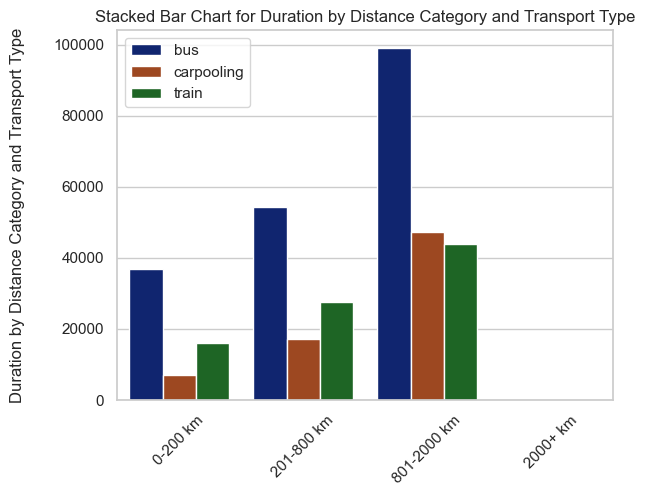

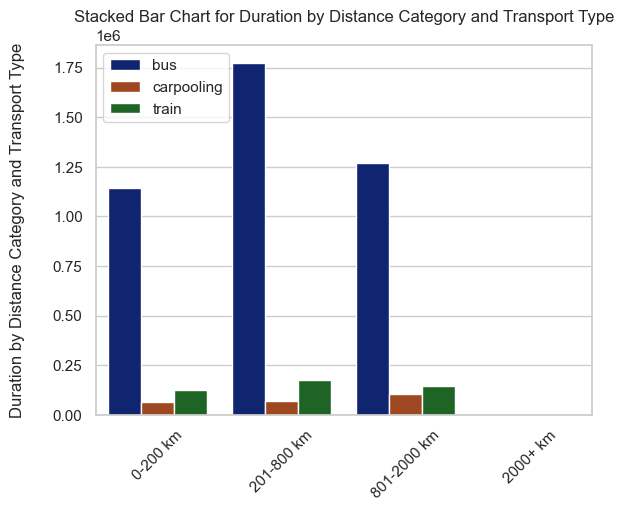

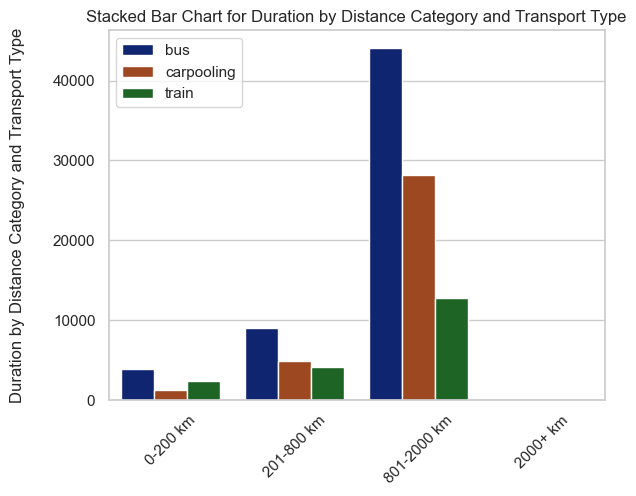

In [213]:
draw_timebar(vis1)
draw_timebar(vis2)
draw_timebar(vis3)


## Prediction

In [255]:
ticket_copy.columns

Index(['ticket_id', 'company', 'o_station', 'd_station', 'departure_ts',
       'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations',
       'other_companies', 'o_city', 'd_city', 'duration', 'coor_o_city',
       'coor_d_city', 'dis_city', 'transport_type', 'all_companies',
       'all_transport_types', 'distance_category', 'duration_minutes'],
      dtype='object')

In [259]:
copieticket=ticket.copy()
copiestation=stations.copy()
copieproviders=providers.copy()
copiecities=cities.copy()

In [260]:
merged_tickets_cities = copieticket.merge(copiecities, left_on='o_city', right_on='city_id').merge(copiecities, left_on='d_city', right_on='city_id')

merged_tickets_cities_companies = merged_tickets_cities.merge(copieproviders, left_on='company', right_on='true_company_id')

full_data = merged_tickets_cities_companies.merge(copiestation, left_on='o_station', right_on='station_id').merge(copiestation, left_on='d_station', right_on='station_id')

In [258]:
# Ici, j'ai utilisé le package scikit learn pour alimenter un modèle de forêt aléatoire avec les données

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
     



In [ ]:
# Séparation des champs caractéristiques X et du champ à prédire y

X = final_data[['trip','company_name','has_wifi','has_plug','has_adjustable_seats',
                'has_bicycle','transport_type','trip_duration_in_min','cities_distance_km','stations_distance_km']]
y = final_data.price_in_cents
     



In [ ]:
# Ici j'ai créé des pipelines pour mettre en forme les données afin qu'elles puissent être étudiées par le modèle

numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['trip_duration_in_min','cities_distance_km','stations_distance_km']),
        ('cat', categorical_transformer, ['trip','company_name','has_wifi','has_plug',
                                        'has_adjustable_seats','has_bicycle','transport_type'])
    ])
     



In [ ]:
# Splittage du jeu de données afin d'évaluer la performance du modèle

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)
     

y_valid.shape
     
(14834,)

model = RandomForestRegressor(n_estimators=100, random_state=0)
     



In [ ]:
# Entraînement du modèle

from sklearn.metrics import mean_absolute_error

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

my_pipeline.fit(X_train, y_train)
     



In [ ]:
# Prédiction et évaluation du modèle graĉe à la métrique de l'erreur moyenne absolue (score de 423,5)

preds = my_pipeline.predict(X_valid)

score = mean_absolute_error(y_valid, preds)
print('MAE:', score)
     
MAE: 423.5713652761852



In [ ]:
# Evaluation graphique du modèle, les coûts prédits par le modèle sont les points en bleu, less prix réels sont représentés par la ligne en pointillées noires

plt.scatter(y_valid, preds)
plt.plot([0, np.max(y_valid)], [0, np.max(y_valid)], 'k--', lw=3)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.show()